In [76]:
import pandas as pd
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk


import collections
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS


In [31]:
# Importing modules

df = pd.read_excel('cleanTinder.xlsx')
df.head()

,__v,_id,conversations,conversationsMeta.averageConversationLength,conversationsMeta.averageConversationLengthInDays,conversationsMeta.longestConversation,conversationsMeta.longestConversationInDays,conversationsMeta.medianConversationLength,conversationsMeta.medianConversationLengthInDays,conversationsMeta.nrOfConversations,conversationsMeta.nrOfGhostingsAfterInitialMessage,conversationsMeta.nrOfOneMessageConversations,conversationsMeta.percentOfOneMessageConversations
0,0,00b113ee72d90509f1ae8589044076ee,[],0,0,0,0,0,0,0,0,0,0
1,0,08473dc6cd1a5cc85cb8f3ad414259bd,[],0,0,0,0,0,0,0,0,0,0
2,0,2159d9453b4b2322d1202f2836f08de2,[],0,0,0,0,0,0,0,0,0,0
3,0,2339072b403384b85c08d2ddb0a9c6a9,[],0,0,0,0,0,0,0,0,0,0
4,0,23dbb328ffd9e2fed0e012b922b7f6b2,[],0,0,0,0,0,0,0,0,0,0


# TODO
1. Handle missing values in the ID and Conversations Tab
2. Remove the noise and html entity
3. remove punctuation, lower case, stop words
4. Examine frequently occuring words and add to stop list
5. Run NNMF, 
6. Run BTM, 
7. Run LDA 
8. Run CorEx

In [36]:
df.describe()

,__v,_id,conversations,conversationsMeta.averageConversationLength,conversationsMeta.averageConversationLengthInDays,conversationsMeta.longestConversation,conversationsMeta.longestConversationInDays,conversationsMeta.medianConversationLength,conversationsMeta.medianConversationLengthInDays,conversationsMeta.nrOfConversations,conversationsMeta.nrOfGhostingsAfterInitialMessage,conversationsMeta.nrOfOneMessageConversations,conversationsMeta.percentOfOneMessageConversations
count,1934,1868,1634,835,835,832,839,832,833,835,834,833,831
unique,657,1552,1404,524,676,318,657,280,448,363,275,335,391
top,0,"sent_date"""":""""Fri","from"""":""""You""""","from"""":""""You""""",0,"from"""":""""You""""","from"""":""""You""""",1,0,"from"""":""""You""""",0,0,0
freq,1210,51,97,113,57,93,76,132,185,44,241,81,78


In [16]:
df.columns

Index(['__v', '_id', 'conversations',
       'conversationsMeta.averageConversationLength',
       'conversationsMeta.averageConversationLengthInDays',
       'conversationsMeta.longestConversation',
       'conversationsMeta.longestConversationInDays',
       'conversationsMeta.medianConversationLength',
       'conversationsMeta.medianConversationLengthInDays',
       'conversationsMeta.nrOfConversations',
       'conversationsMeta.nrOfGhostingsAfterInitialMessage',
       'conversationsMeta.nrOfOneMessageConversations',
       'conversationsMeta.percentOfOneMessageConversations'],
      dtype='object')

## Cleaning Data 
The first step is to examin the data and understand what I am working with. There are many missing values in the data so the first step is to find that information and drop it

In [17]:
tinder = df

In [29]:
print('Number of columns with no id is ',tinder['_id'].isna().sum(), 'and the number of conversations with no value is', tinder['conversations'].isna().sum())


Number of columns with no id is  91 and the number of conversations with no value is 325


In [32]:
tinder = tinder.dropna(subset=['_id'])

In [33]:
tinder.describe()

,__v,_id,conversations,conversationsMeta.averageConversationLength,conversationsMeta.averageConversationLengthInDays,conversationsMeta.longestConversation,conversationsMeta.longestConversationInDays,conversationsMeta.medianConversationLength,conversationsMeta.medianConversationLengthInDays,conversationsMeta.nrOfConversations,conversationsMeta.nrOfGhostingsAfterInitialMessage,conversationsMeta.nrOfOneMessageConversations,conversationsMeta.percentOfOneMessageConversations
count,1843,1868,1634,835,835,832,839,832,833,835,834,833,831
unique,566,1552,1404,524,676,318,657,280,448,363,275,335,391
top,0,"sent_date"""":""""Fri","from"""":""""You""""","from"""":""""You""""",0,"from"""":""""You""""","from"""":""""You""""",1,0,"from"""":""""You""""",0,0,0
freq,1210,51,97,113,57,93,76,132,185,44,241,81,78


In [58]:
tinder = tinder.dropna(subset=['conversations'])

In [35]:
df.describe()

,__v,_id,conversations,conversationsMeta.averageConversationLength,conversationsMeta.averageConversationLengthInDays,conversationsMeta.longestConversation,conversationsMeta.longestConversationInDays,conversationsMeta.medianConversationLength,conversationsMeta.medianConversationLengthInDays,conversationsMeta.nrOfConversations,conversationsMeta.nrOfGhostingsAfterInitialMessage,conversationsMeta.nrOfOneMessageConversations,conversationsMeta.percentOfOneMessageConversations
count,1934,1868,1634,835,835,832,839,832,833,835,834,833,831
unique,657,1552,1404,524,676,318,657,280,448,363,275,335,391
top,0,"sent_date"""":""""Fri","from"""":""""You""""","from"""":""""You""""",0,"from"""":""""You""""","from"""":""""You""""",1,0,"from"""":""""You""""",0,0,0
freq,1210,51,97,113,57,93,76,132,185,44,241,81,78


Removing the rows where there is no ID and no value in conversations

In [39]:
# Examine the data types
tinder.dtypes

__v                                                   object
_id                                                   object
conversations                                         object
conversationsMeta.averageConversationLength           object
conversationsMeta.averageConversationLengthInDays     object
conversationsMeta.longestConversation                 object
conversationsMeta.longestConversationInDays           object
conversationsMeta.medianConversationLength            object
conversationsMeta.medianConversationLengthInDays      object
conversationsMeta.nrOfConversations                   object
conversationsMeta.nrOfGhostingsAfterInitialMessage    object
conversationsMeta.nrOfOneMessageConversations         object
conversationsMeta.percentOfOneMessageConversations    object
dtype: object

In [40]:
#changing the data type of conversation into a string to work with the data
tinder = tinder.astype({'conversations':'string'})

In [53]:
tinder['conversations'].iloc[100]

'[{"match_id":"Match 4","messages":[{"to":3,"from":"You","message":"Hi! There sure are a lot of germans studying here \uf8ffü§£\uf8ffü§£. Are you at KI?","sent_date":"Sat, 20 Mar 2021 23:04:22 GMT"},{"to":3,"from":"You","message":"Okay! What&apos;s your field? Could it be toxicology. I hope not \uf8ffü•≤\uf8ffüí©. \\n\\nI&apos;m working full time. No concrete plans to go back to school for a while. Working at a Service Desk for an insurance company","sent_date":"Sun, 21 Mar 2021 09:03:15 GMT"},{"to":3,"from":"You","message":"That&apos;s really cool and interesting!","sent_date":"Mon, 22 Mar 2021 19:16:58 GMT"},{"to":3,"from":"You","message":"I hope too. I&apos;m sure it&apos;s exactly that down the line.","sent_date":"Mon, 22 Mar 2021 19:53:47 GMT"},{"to":3,"from":"You","message":"How was your day?","sent_date":"Mon, 22 Mar 2021 19:54:08 GMT"},{"to":3,"from":"You","message":"That sounds wonderful! I can relate to the parts about sleep and being tired afterwards. Proof that your brain w

## Cleaning HTML entity

The raw data included html codes in place of certain punctuations like apostrophes. Before punctuation could be cleaned it was important to fix these instances in order to get complete words for the remainder of the topic model analysis

In [59]:
import html

In [60]:
tinder['convo_processed'] = tinder['conversations']

In [61]:
# Using the html.unescape() method to convert html entity into their traditional characters.
tinder['convo_processed'] = tinder['conversations'].map(lambda x: html.unescape(x))

In [65]:
# unscape has worked and the HTML entity has been removed and replaced. Now that data will need to be removed to complete words
tinder['convo_processed'].iloc[188]

'[{"match_id":"Match 10","messages":[{"to":9,"from":"You","message":"Hi! How are you spending your summer? Are you on holiday?","sent_date":"Sat, 31 Jul 2021 00:06:56 GMT"}]},{"match_id":"Match 9","messages":[{"to":8,"from":"You","message":"Ciao! Come stai passando l’estate? Sei in vacanza?","sent_date":"Sat, 31 Jul 2021 00:05:59 GMT"}]},{"match_id":"Match 8","messages":[{"to":7,"from":"You","message":"Ciao, vai spesso a sciare?","sent_date":"Sat, 24 Jul 2021 00:00:50 GMT"}]},{"match_id":"Match 7","messages":[{"to":6,"from":"You","message":"Hi Kira! What’s up? Are you here in Italy?","sent_date":"Tue, 20 Jul 2021 06:03:30 GMT"},{"to":6,"from":"You","message":"I’m new to tinder, I’m not sure why I’m seeing so much US people","sent_date":"Tue, 20 Jul 2021 08:00:14 GMT"},{"to":6,"from":"You","message":"I like it though","sent_date":"Tue, 20 Jul 2021 08:00:23 GMT"},{"to":6,"from":"You","message":"What are you studying?","sent_date":"Thu, 22 Jul 2021 17:06:53 GMT"},{"to":6,"from":"You","mes

In [67]:
# Numbers appear often in the text so numbers will also be removed as they do not appear to be important in the analysis
tinder['convo_processed'] = tinder['convo_processed'].str.replace('’', '')
tinder['convo_processed'].iloc[188]

'[{"match_id":"Match 10","messages":[{"to":9,"from":"You","message":"Hi! How are you spending your summer? Are you on holiday?","sent_date":"Sat, 31 Jul 2021 00:06:56 GMT"}]},{"match_id":"Match 9","messages":[{"to":8,"from":"You","message":"Ciao! Come stai passando lestate? Sei in vacanza?","sent_date":"Sat, 31 Jul 2021 00:05:59 GMT"}]},{"match_id":"Match 8","messages":[{"to":7,"from":"You","message":"Ciao, vai spesso a sciare?","sent_date":"Sat, 24 Jul 2021 00:00:50 GMT"}]},{"match_id":"Match 7","messages":[{"to":6,"from":"You","message":"Hi Kira! Whats up? Are you here in Italy?","sent_date":"Tue, 20 Jul 2021 06:03:30 GMT"},{"to":6,"from":"You","message":"Im new to tinder, Im not sure why Im seeing so much US people","sent_date":"Tue, 20 Jul 2021 08:00:14 GMT"},{"to":6,"from":"You","message":"I like it though","sent_date":"Tue, 20 Jul 2021 08:00:23 GMT"},{"to":6,"from":"You","message":"What are you studying?","sent_date":"Thu, 22 Jul 2021 17:06:53 GMT"},{"to":6,"from":"You","message"

In [68]:
# Load the regular expression library
import re

# Remove punctuation
tinder['convo_processed'] = \
tinder['convo_processed'].str.replace(r'[^\w\s]+', ' ')


/var/folders/c8/wpdzrwz927n1c_62qh7d67h40000gn/T/ipykernel_6851/3293966556.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  tinder['convo_processed'].str.replace(r'[^\w\s]+', ' ')


In [69]:
# Convert the titles to lowercase
tinder['convo_processed'] = \
tinder['convo_processed'].map(lambda x: x.lower())

In [70]:
tinder['convo_processed'].iloc[188]


' match_id match 10 messages to 9 from you message hi  how are you spending your summer  are you on holiday sent_date sat  31 jul 2021 00 06 56 gmt match_id match 9 messages to 8 from you message ciao  come stai passando lestate  sei in vacanza sent_date sat  31 jul 2021 00 05 59 gmt match_id match 8 messages to 7 from you message ciao  vai spesso a sciare sent_date sat  24 jul 2021 00 00 50 gmt match_id match 7 messages to 6 from you message hi kira  whats up  are you here in italy sent_date tue  20 jul 2021 06 03 30 gmt to 6 from you message im new to tinder  im not sure why im seeing so much us people sent_date tue  20 jul 2021 08 00 14 gmt to 6 from you message i like it though sent_date tue  20 jul 2021 08 00 23 gmt to 6 from you message what are you studying sent_date thu  22 jul 2021 17 06 53 gmt to 6 from you message yes  whats your major sent_date fri  23 jul 2021 05 36 28 gmt to 6 from you message sounds interesting sent_date fri  23 jul 2021 23 58 42 gmt match_id match 6 mes

In [71]:
# Numbers appear often in the text so numbers will also be removed as they do not appear to be important in the analysis
tinder['convo_processed'] = tinder['convo_processed'].str.replace('\d+', '')

/var/folders/c8/wpdzrwz927n1c_62qh7d67h40000gn/T/ipykernel_6851/2604931852.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tinder['convo_processed'] = tinder['convo_processed'].str.replace('\d+', '')


In [73]:
tinder['convo_processed'].iloc[188]

' match_id match  messages to  from you message hi  how are you spending your summer  are you on holiday sent_date sat   jul     gmt match_id match  messages to  from you message ciao  come stai passando lestate  sei in vacanza sent_date sat   jul     gmt match_id match  messages to  from you message ciao  vai spesso a sciare sent_date sat   jul     gmt match_id match  messages to  from you message hi kira  whats up  are you here in italy sent_date tue   jul     gmt to  from you message im new to tinder  im not sure why im seeing so much us people sent_date tue   jul     gmt to  from you message i like it though sent_date tue   jul     gmt to  from you message what are you studying sent_date thu   jul     gmt to  from you message yes  whats your major sent_date fri   jul     gmt to  from you message sounds interesting sent_date fri   jul     gmt match_id match  messages to  from you message hi pim  is that husky yours sent_date mon   jul     gmt to  from you message its very cute sent_

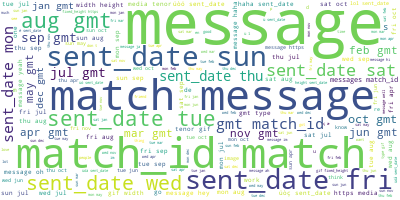

In [75]:
# Join the different processed titles together.
long_string = ','.join(list(tinder['convo_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Creation of stop word list
Now that 

In [103]:
from collections import Counter
freq_words = Counter(" ".join(tinder['convo_processed']).split()).most_common(45)
freq_words

[('you', 248250),
 ('to', 241751),
 ('from', 211482),
 ('sent_date', 206375),
 ('gmt', 206102),
 ('message', 203608),
 ('i', 60601),
 ('a', 38413),
 ('match', 37742),
 ('messages', 37379),
 ('match_id', 37135),
 ('sun', 31619),
 ('fri', 30939),
 ('tue', 29779),
 ('the', 29720),
 ('aug', 29474),
 ('wed', 29280),
 ('sat', 28958),
 ('mon', 28758),
 ('thu', 27935),
 ('jul', 24955),
 ('sep', 23974),
 ('and', 20179),
 ('in', 19939),
 ('it', 18850),
 ('oct', 18610),
 ('s', 18545),
 ('that', 15691),
 ('apr', 15453),
 ('of', 15272),
 ('n', 15079),
 ('jun', 14982),
 ('nov', 14688),
 ('is', 14153),
 ('for', 14030),
 ('feb', 13706),
 ('so', 13703),
 ('mar', 13646),
 ('may', 13620),
 ('my', 12064),
 ('dec', 12019),
 ('m', 11956),
 ('jan', 11821),
 ('but', 11797),
 ('do', 11796)]

In [107]:
data = pd.DataFrame(data=freq_words)
data


,0,1
0,you,248250
1,to,241751
2,from,211482
3,sent_date,206375
4,gmt,206102
5,message,203608
6,i,60601
7,a,38413
8,match,37742
9,messages,37379


In [111]:
stop_add_list = data[0].tolist()
stop_add_list

['you',
 'to',
 'from',
 'sent_date',
 'gmt',
 'message',
 'i',
 'a',
 'match',
 'messages',
 'match_id',
 'sun',
 'fri',
 'tue',
 'the',
 'aug',
 'wed',
 'sat',
 'mon',
 'thu',
 'jul',
 'sep',
 'and',
 'in',
 'it',
 'oct',
 's',
 'that',
 'apr',
 'of',
 'n',
 'jun',
 'nov',
 'is',
 'for',
 'feb',
 'so',
 'mar',
 'may',
 'my',
 'dec',
 'm',
 'jan',
 'but',
 'do']

In [81]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dominicabogado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## Stop Word List Creation
In the raw dataset, the conversations column contained many phrases to indicate the passage of conversation including match_id, match, message, and date related phrases such as days of the week and month. Additionally phrases like apos, rsquo, and rsquo. Lastly

In [134]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(stop_add_list)

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = tinder.convo_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[]


In [171]:
stop_words = stopwords.words(['english'])
stop_words.extend(stop_add_list)

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = tinder.convo_processed.values.tolist()
tinder['convo_tkn'] = list(sent_to_words(data))
tinder['convo_tkn'] = remove_stopwords(tinder['convo_tkn'])

In [180]:
data_words = tinder['convo_tkn']

In [176]:
print(tinder['convo_tkn'][117])

['powerful', 'righteous', 'yes', 'actually', 'dived', 'headfirst', 'boneyard', 'creek', 'think', 'would', 'enjoyable', 'thought', 'boneyard', 'creek', 'really', 'shallow', 'youd', 'hurt', 'head', 'something', 'think', 'going', 'need', 'video', 'proof', 'understandable', 'although', 'see', 'sometime', 'research', 'purposes', 'uße', 'reading', 'days', 'olivia', 'yes', 'plan', 'collect', 'dirt', 'extort', 'concrete', 'side', 'tables', 'cookies', 'nonfiction', 'girl', 'eh', 'definitely', 'lot', 'stuff', 'improve', 'well', 'maybe', 'read', 'sometime', 'friend', 'highschool', 'bulimia', 'definitely', 'rough', 'super', 'long', 'time', 'since', 'read', 'seriously', 'emotional', 'book', 'like', 'lately', 'trying', 'mystery', 'genre', 'uße', 'almost', 'done', 'first', 'agatha', 'christie', 'book', 'cant', 'recommend', 'anything', 'quite', 'yet', 'although', 'say', 'definitely', 'lot', 'lighthearted', 'cheesy', 'seem', 'normally', 'read', 'help', 'solve', 'mystery', 'phone', 'number', 'thank', 'c

In [182]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[117])

[(2, 2), (4, 1), (10, 8), (12, 1), (13, 1), (15, 7), (16, 1), (31, 1), (58, 1), (61, 1), (76, 1), (87, 1), (104, 10), (114, 4), (120, 4), (125, 2), (126, 1), (149, 1), (207, 1), (215, 1), (254, 2), (259, 1), (265, 1), (266, 3), (267, 5), (287, 1), (294, 1), (325, 1), (331, 6), (332, 6), (335, 1), (338, 2), (345, 2), (346, 1), (348, 2), (376, 3), (392, 1), (401, 1), (450, 1), (463, 3), (464, 1), (476, 1), (494, 1), (527, 14), (550, 7), (551, 22), (552, 14), (553, 14), (556, 14), (557, 28), (558, 14), (562, 3), (574, 1), (592, 1), (702, 1), (942, 3), (974, 1), (975, 1), (1030, 10), (1147, 1), (1175, 1), (1252, 1), (1287, 1), (1457, 1), (1486, 2), (1488, 3), (1489, 1), (1490, 2), (1491, 1), (1496, 1), (1498, 1), (1504, 1), (1513, 2), (1517, 8), (1551, 1), (1728, 1), (1769, 1), (1790, 1), (1813, 1), (1852, 1), (1926, 1), (1971, 1), (2029, 1), (2036, 1), (2074, 1), (2114, 1), (2201, 1), (2233, 1), (2692, 1), (2769, 1), (2924, 1), (3085, 2), (3127, 1), (3451, 3), (3633, 2), (3710, 1), (4393,

In [184]:
from pprint import pprint

# number of topics
num_topics = 50

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(31,
  '0.010*"uoc" + 0.008*"like" + 0.008*"uoa" + 0.007*"je" + 0.006*"haha" + '
  '0.004*"good" + 0.004*"uoo" + 0.004*"one" + 0.004*"know" + 0.003*"ja"'),
 (17,
  '0.010*"gif" + 0.007*"je" + 0.006*"height" + 0.006*"https" + 0.006*"ik" + '
  '0.005*"tenor" + 0.005*"width" + 0.005*"media" + 0.004*"images" + '
  '0.004*"like"'),
 (25,
  '0.011*"uoa" + 0.011*"like" + 0.006*"uoc" + 0.006*"hey" + 0.006*"good" + '
  '0.005*"get" + 0.004*"know" + 0.004*"time" + 0.004*"work" + 0.004*"uoo"'),
 (5,
  '0.012*"like" + 0.008*"haha" + 0.008*"uoa" + 0.007*"uoc" + 0.005*"det" + '
  '0.005*"lol" + 0.005*"uoo" + 0.004*"gif" + 0.004*"get" + 0.004*"good"'),
 (3,
  '0.006*"like" + 0.006*"uoc" + 0.005*"gif" + 0.005*"ja" + 0.005*"haha" + '
  '0.004*"uoa" + 0.003*"media" + 0.003*"je" + 0.003*"co" + 0.003*"tenor"'),
 (33,
  '0.009*"like" + 0.008*"hey" + 0.007*"uoc" + 0.006*"haha" + 0.006*"uoa" + '
  '0.005*"good" + 0.005*"gif" + 0.005*"lol" + 0.004*"going" + 0.004*"uoo"'),
 (38,
  '0.008*"je" + 0.005*"like" +

In [186]:
perplexity = lda_model.log_perplexity(corpus)
print(perplexity)

-12.188484575834352
